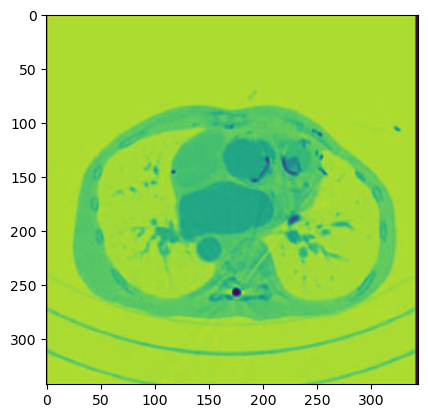

In [1]:
from PIL import Image 
import math 
import scipy
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('world_cup.png').convert('L')
im_1 = np.asarray (img)
im_2 = 255 - im_1
new_img = Image.fromarray(im_2)
img.show ()
plt.imshow(new_img)
plt.show()

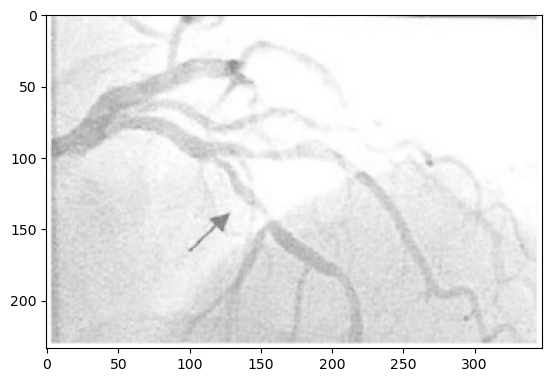

In [1]:
from PIL import Image 
import math 
import scipy
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('2.png').convert('L')

im_1 = np.asarray(img)

gamma = 0.5
b1 = im_1.astype(float)
b2 = np.max(b1)
b3 = b1/b2
b2 = np.log(b3) * gamma
c = np.exp(b2) * 255.0
c1 = c.astype(int)
d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

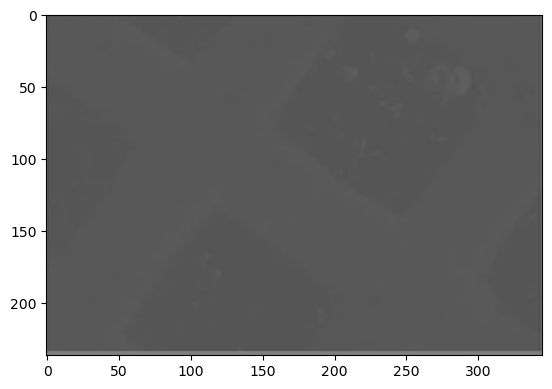

In [2]:
from PIL import Image 
import math 
import scipy
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('3.png').convert('L')

im_1 = np.asarray(img)

b1 = im_1.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(1 + b1))/np.log(1+b2)
c1 = c.astype(int)
d = Image.fromarray(c1)
img.show()
d.show()
plt.imshow(d)
plt.show()

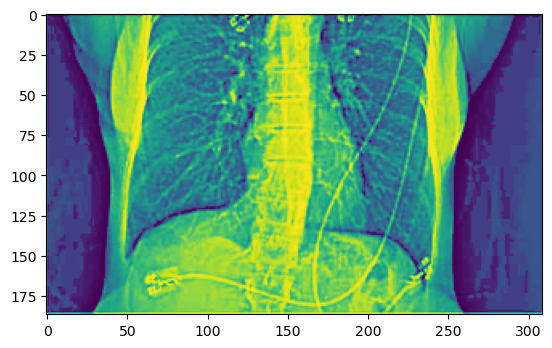

In [6]:
from PIL import Image 
import math 
import scipy
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('4.png').convert('L')
im1 = np.asarray(img)

b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m -cdf_m.min()) * 255
den_cdf_m = (cdf.max () - cdf_m.min ())
cdf_m = num_cdf_m/den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

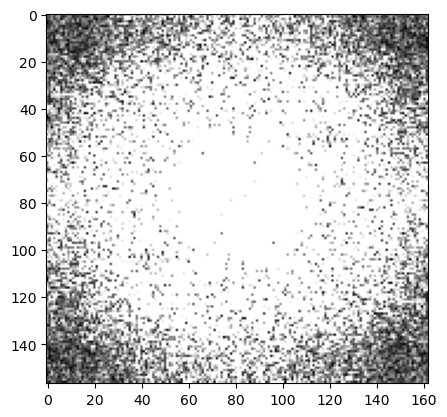

In [7]:
from PIL import Image 
import math 
import scipy
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('5.png').convert('L')
im1 = np.asarray(img)

c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

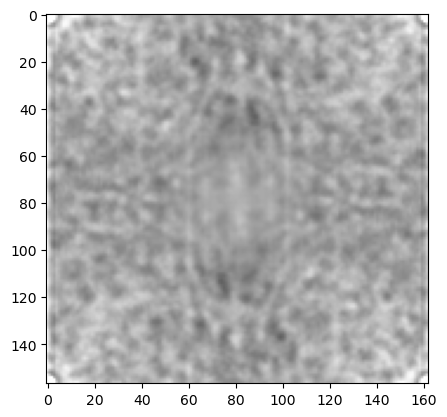

In [8]:
from PIL import Image 
import math 
import scipy
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('5.png').convert('L')
im1 = np.asarray(img)

c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M,N))
centerl = M/2
center2 = N/2
d_0 = 30.0 
t1 = 1
t2=2*t1
for i in range (1, M) :
    for j in range (1, N) :
        r1 = (i - centerl)**2 + (j - center2) **2
        r = math.sqrt(r1)
        if r>d_0:
            H[i,j]* 1/(1 + (r/d_0) **t1)
H = H.astype (float)
H = Image.fromarray(H)

con = d * H

e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray (e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()